# Test Types
In this visuals we want to discorer the following

* Visualize what test types are being used the most.
* Visualize what test types give the most issues(blast and linter)

importing libararies

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the data

In [8]:
read_linting_results = pd.read_csv('data/blast_linting_results.csv')
read_review_test_results = pd.read_csv('data/blast_review_test_results.csv')
read_reviews = pd.read_csv('data/blast_reviews.csv')
data_tests = pd.read_csv('data/blast_tests.csv')
read_exercises = pd.read_csv('data/exercises.csv')
data_tests

,title,exercise_id,test_type
0,test,3799c32f-110a-4e50-acea-4e47ac3bd569,PHP_UNIT
1,Onaangetaste bestanden,0fbd3585-4e7f-11eb-bd18-4213e7ee7fac,PHP_UNIT
2,Onaangetaste bestanden,5e1a31fc-4b89-11eb-8a52-4213e7ee7fac,PHP_UNIT
3,Onaangetaste bestanden,317dbbb3-4e7b-11eb-bd18-4213e7ee7fac,PHP_UNIT
4,PHP Test,8ddcf7f6-acc2-11eb-89a3-4213e7ee7fac,PHP_UNIT
...,...,...,...
562,Test 1,180e6b42-d7f6-11ea-b861-cec41367f4e7,PHP_UNIT
563,Test 1,c2a607be-d4a0-11e9-add2-cec41367f4e7,PHP_UNIT
564,Test 1,9cf87dd3-d4a1-11e9-add2-cec41367f4e7,PHP_UNIT
565,Test 1,aa2745e9-c334-11e9-afed-cec41367f4e7,PHP_UNIT


# Cleaned data

In [9]:
data_linting_result= read_linting_results[['blast_review_id', 'file_name', 'message', 'type', 'line', 'column']]
data_linting_result = data_linting_result[data_linting_result['type'].str.lower().isin(['error'])]

data_review_test_results = read_review_test_results[['blast_review_id', 'test_id', 'human_error_message', 'test_language']]

data_reviews = read_reviews[['id', 'implementation_id', 'state', 'created_on']]

data_exercises = read_exercises[['id', 'title', 'files_to_turn_in']]
data_tests


,title,exercise_id,test_type
0,test,3799c32f-110a-4e50-acea-4e47ac3bd569,PHP_UNIT
1,Onaangetaste bestanden,0fbd3585-4e7f-11eb-bd18-4213e7ee7fac,PHP_UNIT
2,Onaangetaste bestanden,5e1a31fc-4b89-11eb-8a52-4213e7ee7fac,PHP_UNIT
3,Onaangetaste bestanden,317dbbb3-4e7b-11eb-bd18-4213e7ee7fac,PHP_UNIT
4,PHP Test,8ddcf7f6-acc2-11eb-89a3-4213e7ee7fac,PHP_UNIT
...,...,...,...
562,Test 1,180e6b42-d7f6-11ea-b861-cec41367f4e7,PHP_UNIT
563,Test 1,c2a607be-d4a0-11e9-add2-cec41367f4e7,PHP_UNIT
564,Test 1,9cf87dd3-d4a1-11e9-add2-cec41367f4e7,PHP_UNIT
565,Test 1,aa2745e9-c334-11e9-afed-cec41367f4e7,PHP_UNIT


Counting the tests

In [10]:
unique_counts = data_tests["test_type"].value_counts()
unique_counts

PHP_UNIT    410
PYTHON       99
NODE_JS      57
C_SHARP       1
Name: test_type, dtype: int64

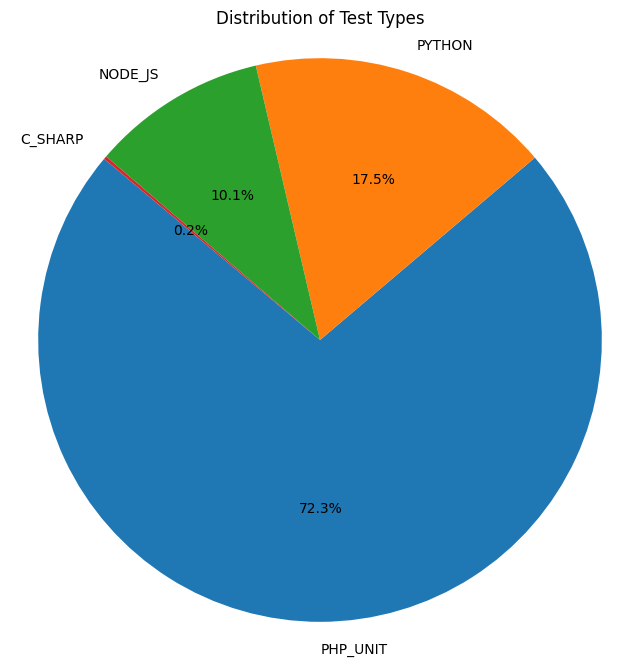

In [11]:
# Assuming you have already calculated unique_counts using value_counts()
unique_counts = data_tests["test_type"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(unique_counts, labels=unique_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Test Types")
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the pie chart
plt.show()


Visualize what test types give the most issues(blast and linter)

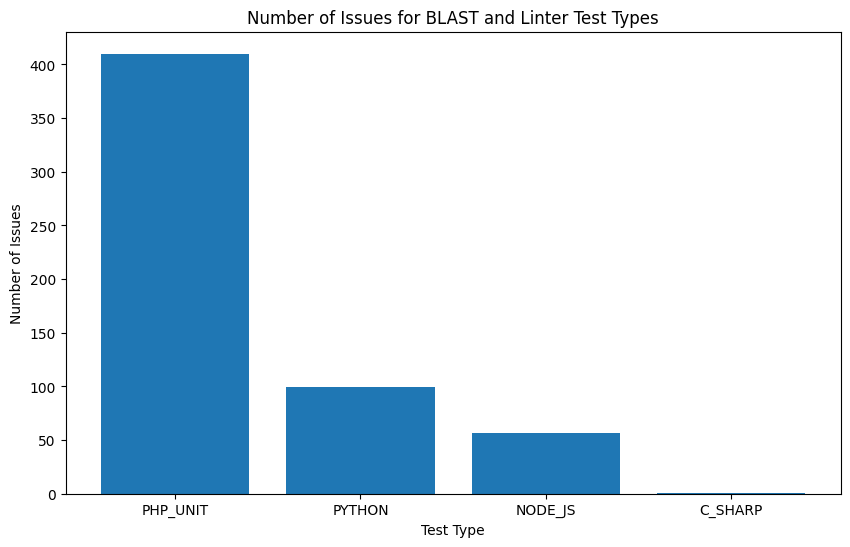

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of issues for each test type
issues_count = data_tests["test_type"].value_counts()

# Create a DataFrame for the counts
issues_df = issues_count.reset_index()
issues_df.columns = ["test_type", "issue_count"]

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(issues_df["test_type"], issues_df["issue_count"])
plt.xlabel("Test Type")
plt.ylabel("Number of Issues")
plt.title("Number of Issues for BLAST and Linter Test Types")
plt.show()
